# Assignment 2 - Machine Learning

In [1]:
IMAGES_FILE = "images.csv"
TEST_TRAIN_SPLIT = 0.2

from models.utils import prep_data
data, train_data, val_data = prep_data(IMAGES_FILE, TEST_TRAIN_SPLIT)
data.head()

Training set: 2959 rows
Validation set: 740 rows


,path,shape,type
0,images\diamond\rightofway\00032_00000.png,diamond,rightofway
1,images\diamond\rightofway\00032_00001.png,diamond,rightofway
2,images\diamond\rightofway\00032_00002.png,diamond,rightofway
3,images\diamond\rightofway\00037_00000.png,diamond,rightofway
4,images\diamond\rightofway\00037_00001.png,diamond,rightofway


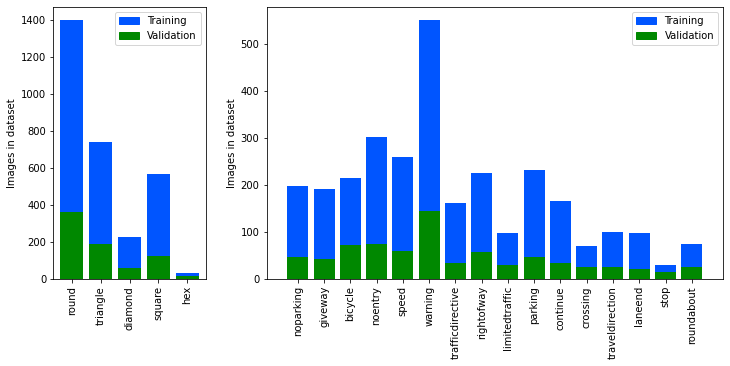

In [2]:
from models.eda import classes_histogram
classes_histogram(train_data, val_data, ["shape", "type"])

## Model training - Shape

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 28
TEST_SIZE = 128

from models.utils import create_generator
from models.utils import history_graph
from models.test import score_f1
import models.MLP as mlp
import models.alexnet as alex
import models.vggnet as vgg

train_shape_images = create_generator(train_data, "shape", IMAGE_SIZE, BATCH_SIZE)
val_shape_images = create_generator(val_data, "shape", IMAGE_SIZE, BATCH_SIZE)

Found 2959 validated image filenames belonging to 5 classes.
Found 740 validated image filenames belonging to 5 classes.


### Model 1 - Multi-layer Perceptron

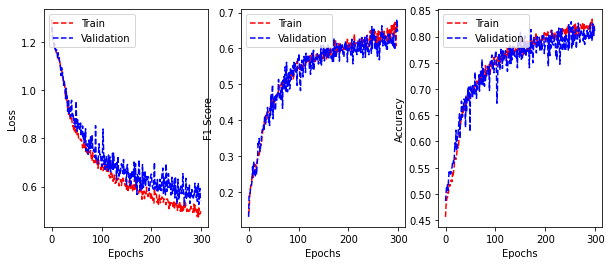

Overall F1 Macro Score: 0.6279


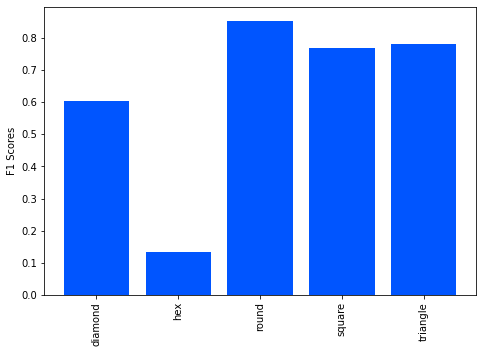

In [19]:
mlp_shape_model, mlp_shape_history = mlp.fit_model(
    data, 
    "shape", 
    train_shape_images, 
    val_shape_images, 
    IMAGE_SIZE, 
    epochs = 300)

history_graph(mlp_shape_history)
score_f1(mlp_shape_model, val_shape_images, TEST_SIZE)

### Model 2 - AlexNet

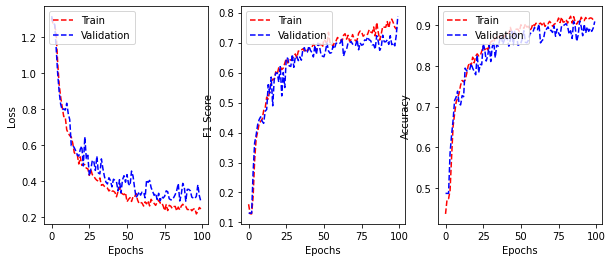

Overall F1 Macro Score: 0.7214


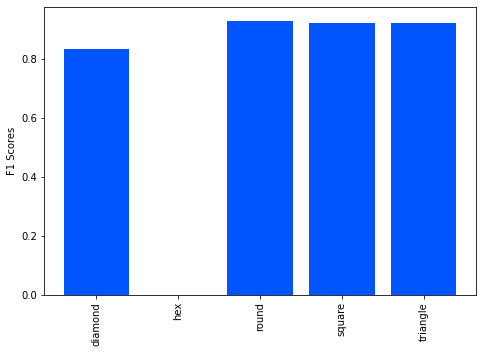

In [5]:
alex_shape_model, alex_shape_history = alex.fit_model(
    data, 
    "shape", 
    train_shape_images, 
    val_shape_images, 
    IMAGE_SIZE, 
    epochs = 100)

history_graph(alex_shape_history)
score_f1(alex_shape_model, val_shape_images, TEST_SIZE)

### Model 3 - Modified VGGNet

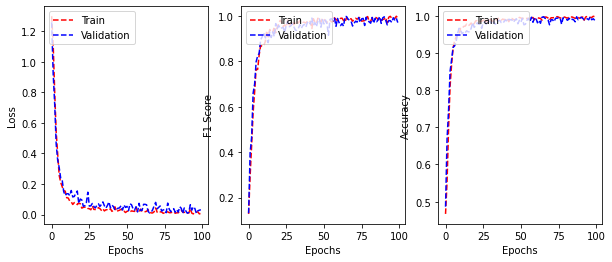

Overall F1 Macro Score: 0.9838


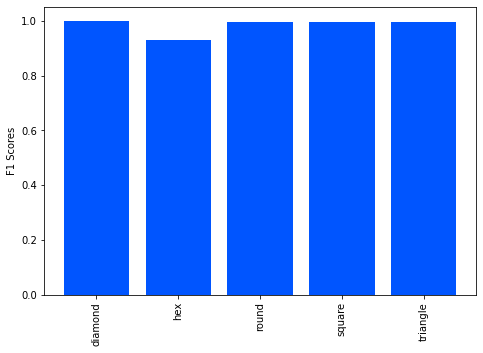

In [6]:
vgg_shape_model, vgg_shape_history = vgg.fit_model(
    data, 
    "shape", 
    train_shape_images, 
    val_shape_images, 
    IMAGE_SIZE, 
    epochs = 100)

history_graph(vgg_shape_history)
score_f1(vgg_shape_model, val_shape_images, TEST_SIZE)

## Model Training - Type

In [7]:
train_type_images = create_generator(train_data, "type", IMAGE_SIZE, BATCH_SIZE)
val_type_images = create_generator(val_data, "type", IMAGE_SIZE, BATCH_SIZE)

Found 2959 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


### Model 1 - Multi-layer Perceptron

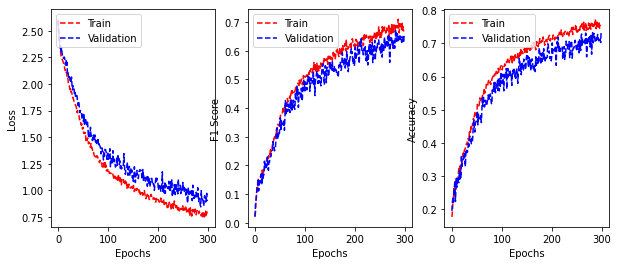

Overall F1 Macro Score: 0.6203


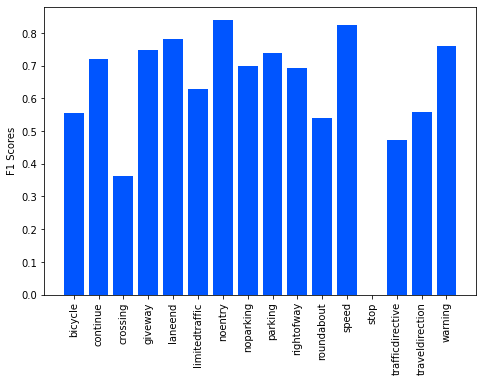

In [20]:
mlp_type_model, mlp_type_history = mlp.fit_model(
    data, 
    "type", 
    train_type_images, 
    val_type_images, 
    IMAGE_SIZE, 
    epochs = 300)
    
history_graph(mlp_type_history)
score_f1(mlp_type_model, val_type_images, TEST_SIZE)

### Model 2 - AlexNet

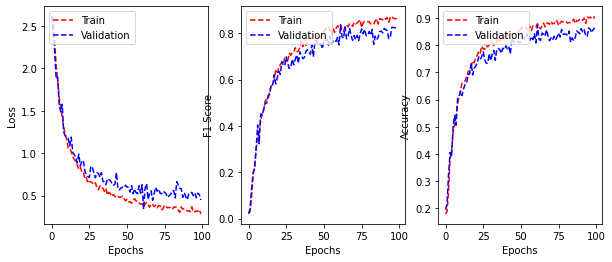

Overall F1 Macro Score: 0.8224


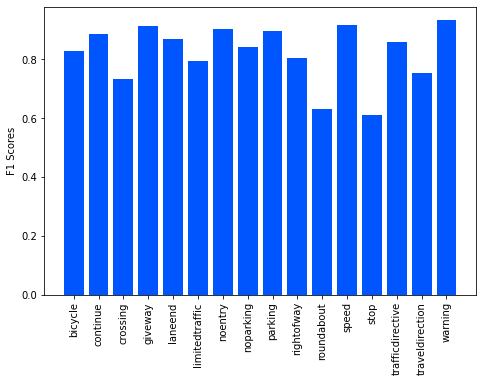

In [9]:
alex_type_model, alex_type_history = alex.fit_model(
    data, 
    "type", 
    train_type_images, 
    val_type_images, 
    IMAGE_SIZE, 
    epochs = 100)

history_graph(alex_type_history)
score_f1(alex_type_model, val_type_images, TEST_SIZE)

### Model 3 - Modified VGGNet

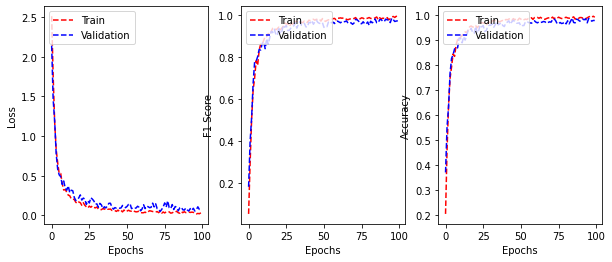

Overall F1 Macro Score: 0.9721


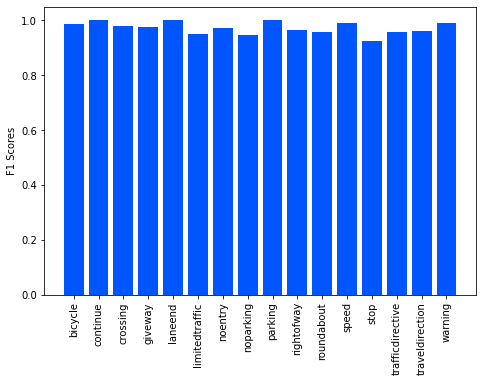

In [10]:
vgg_type_model, vgg_type_history = vgg.fit_model(
    data, 
    "type", 
    train_type_images, 
    val_type_images, 
    IMAGE_SIZE, 
    epochs = 100)

history_graph(vgg_type_history)
score_f1(vgg_type_model, val_type_images, TEST_SIZE)

## Independent Evaluation - Shape

In [11]:
NUM_TO_VISUALIZE = 20
NUM_TO_F1_SCORE = 100
IMAGES_FILE = "test-images.csv"

from models.test import create_test_generator
from models.test import show_visual_results
from models.test import score_f1

test_images_shape = create_test_generator(IMAGES_FILE, "shape", IMAGE_SIZE, 1)

Found 80 validated image filenames belonging to 5 classes.


### Model 1 - Multi-layer Perceptron

Overall F1 Macro Score: 0.4946


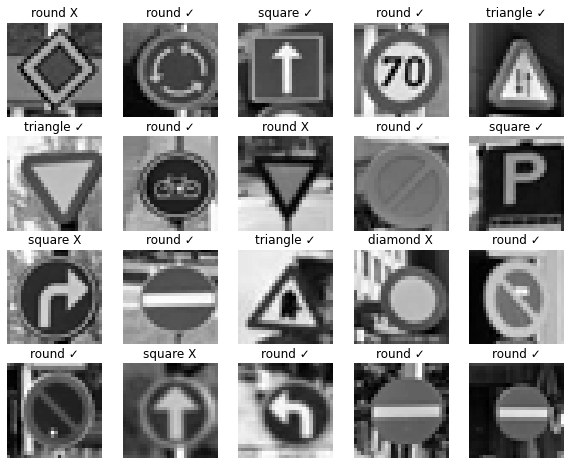

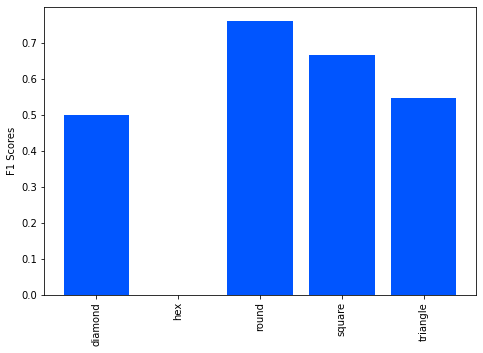

In [21]:
show_visual_results(mlp_shape_model, test_images_shape, NUM_TO_VISUALIZE)
score_f1(mlp_shape_model, test_images_shape, TEST_SIZE)

### Model 2 - AlexNet

Overall F1 Macro Score: 0.6431


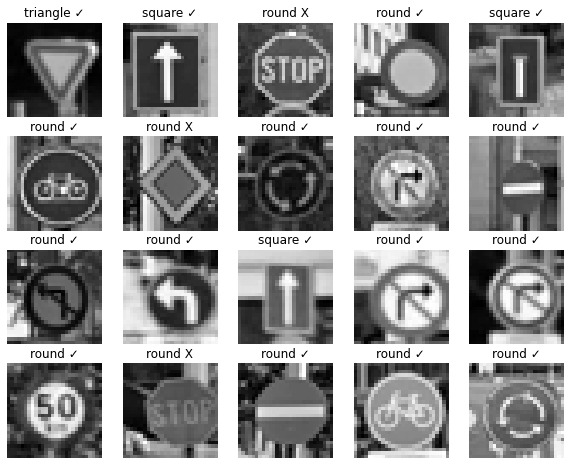

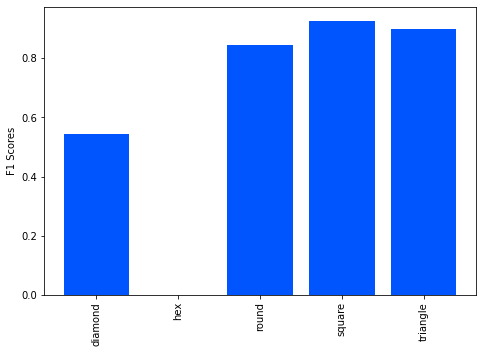

In [13]:
show_visual_results(alex_shape_model, test_images_shape, NUM_TO_VISUALIZE)
score_f1(alex_shape_model, test_images_shape, TEST_SIZE)

### Model 3 - Modified VGGNet

Overall F1 Macro Score: 0.9560


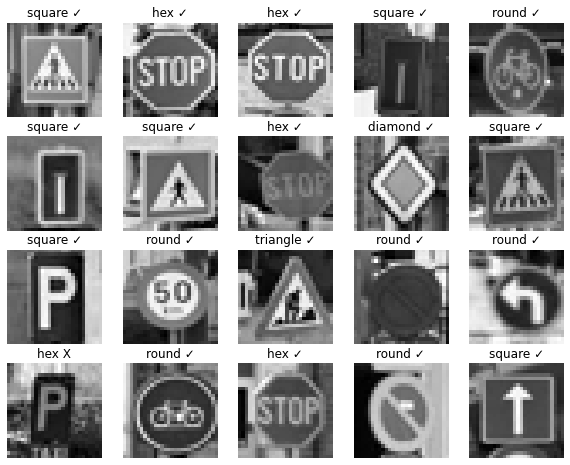

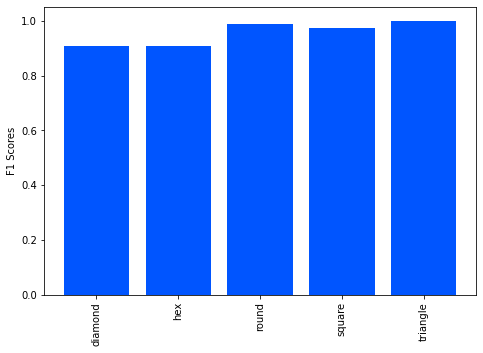

In [14]:
show_visual_results(vgg_shape_model, test_images_shape, NUM_TO_VISUALIZE)
score_f1(vgg_shape_model, test_images_shape, TEST_SIZE)

## Independant Evaluation - Type

In [15]:
test_images_type = create_test_generator(IMAGES_FILE, "type", IMAGE_SIZE, 1)

Found 80 validated image filenames belonging to 16 classes.


### Model 1 - Multi-layer Perceptron

Overall F1 Macro Score: 0.4301


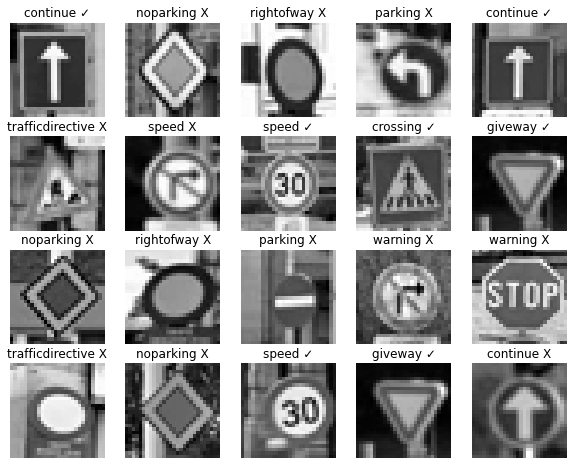

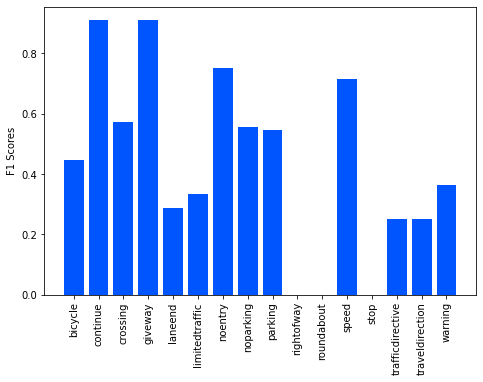

In [22]:
show_visual_results(mlp_type_model, test_images_type, NUM_TO_VISUALIZE)
score_f1(mlp_type_model, test_images_type, TEST_SIZE)

### Model 2 - AlexNet

Overall F1 Macro Score: 0.7081


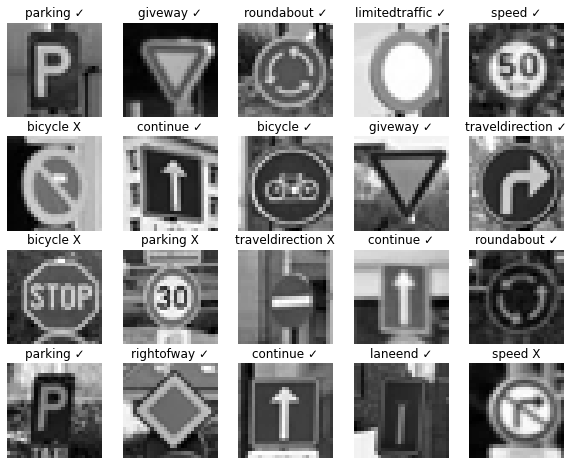

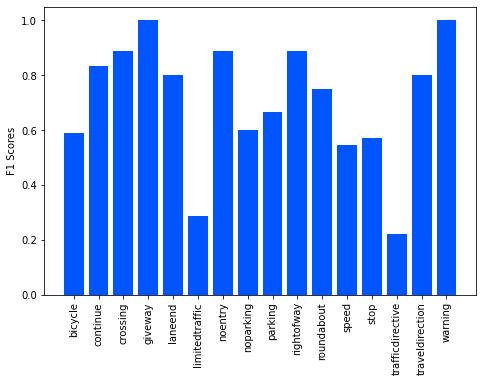

In [17]:
show_visual_results(alex_type_model, test_images_type, NUM_TO_VISUALIZE)
score_f1(alex_type_model, test_images_type, TEST_SIZE)

### Model 3 - Modified VGGNet

Overall F1 Macro Score: 0.9244


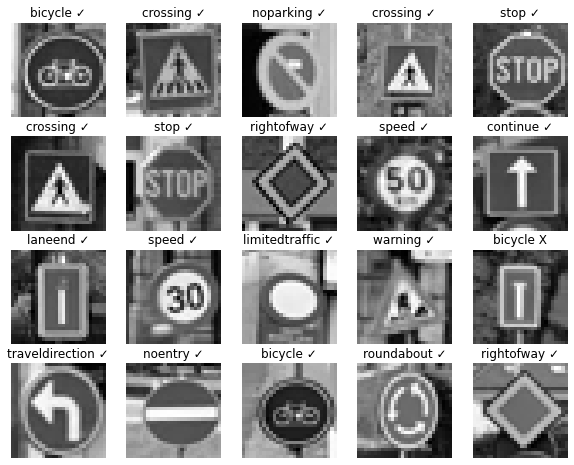

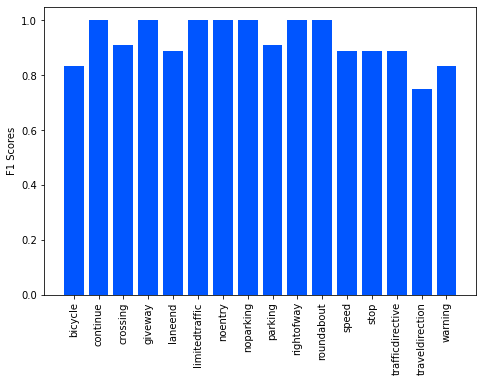

In [18]:
show_visual_results(vgg_type_model, test_images_type, NUM_TO_VISUALIZE)
score_f1(vgg_type_model, test_images_type, TEST_SIZE)